In [2]:
import pandas as pd
import uproot
import numpy as np
import cmath
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import moments
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.rcParams["font.family"] = "serif"
plt.rcParams["text.usetex"] = True
obsList = ['FL', 'S3', 'S4', 'S5', 'AFB', 'S7', 'S8', 'S9']
optObsList = ['FL', 'P1', 'P2', 'P3', 'P4p', 'P5p', 'P6p', 'P8p']
optimisedObsTranslator = {'FL' : 'FL', 'S3' : 'P1', 'S4' : 'P4p', 'S5' : 'P5p', 'AFB' : 'P2', 'S7' : 'P6p', 'S8' : 'P8p', 'S9' : 'P3'}
obs_to_label = {'FL' : '$F_{L}$', 'S3' : '$S_{3}$', 'S4' : '$S_{4}$', 'S5' : '$S_{5}$', 'AFB' : '$A_{FB}$', 'S7' : '$S_{7}$', 'S8' : '$S_{8}$', 'S9' : '$S_{9}$',
                'P1' : '$P_{1}$', 'P2' : '$P_{2}$', 'P3' : '$P_{3}$', 'P4p' : '$P_{4}^{\prime}$', 'P5p' : '$P_{5}^{\prime}$', 'P6p' : '$P_{6}^{\prime}$', 'P8p' : '$P_{8}^{\prime}$'}

In [3]:
infile = uproot.open('dataset_bin_8.root')['DecayTree'].arrays(library = 'pd')
infile = moments.calculateAllMoments(infile)
infile

,mB,ctl,ctk,phi,mkpi,eff,weight,year,pol,id,q2,moment_FL,moment_S3,moment_S5,moment_S4,moment_AFB,moment_S7,moment_S8,moment_S9
0,5281.523792,0.518319,-0.446815,-1.634906,1.085759,1.0,1.0,2012,-1.0,1,2.630058,-0.000891,-1.814163,0.109504,0.141894,0.777825,1.705720,2.210267,0.233895
1,5295.334854,-0.915502,0.539913,0.848936,0.873574,1.0,1.0,2012,1.0,1,3.107214,0.228766,-0.045416,0.604068,-1.382563,-1.216176,0.686157,-1.570444,0.355469
2,5244.975560,-0.594775,0.202199,1.567005,0.916616,1.0,1.0,2012,-1.0,1,2.668097,-0.397789,-1.936886,0.003018,-0.004487,-1.069609,0.795937,-1.183509,0.014687
3,5186.268392,0.753125,0.331380,-2.539092,0.884139,1.0,1.0,2012,-1.0,1,5.308796,-0.225468,0.430656,-0.847360,-1.595420,1.257041,-0.582826,-1.097353,1.124331
4,5301.733029,-0.303992,-0.646811,-2.472111,0.843597,1.0,1.0,2012,-1.0,1,2.044088,0.545910,0.379024,1.842522,-1.400279,-0.331523,1.458194,-1.108197,1.605512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109561,5288.953340,0.166416,-0.843616,2.094843,0.899377,1.0,1.0,2017,1.0,-1,5.666880,1.279219,-0.437333,1.117518,0.464931,0.089962,-1.933598,-0.804452,-0.759052
109562,5291.991628,0.916267,-0.281367,3.124200,0.936775,1.0,1.0,2017,-1.0,-1,5.411211,-0.302082,0.461447,0.540685,1.238529,1.581991,-0.009405,-0.021543,-0.016058
109563,5304.412408,-0.479497,-0.662125,-0.960451,0.874149,1.0,1.0,2017,1.0,-1,2.866205,0.596024,-0.463551,-1.247835,1.495833,-0.504902,1.784067,-2.138637,-1.269486
109564,5272.182373,-0.351987,0.479844,1.542134,0.908921,1.0,1.0,2017,-1.0,-1,1.293735,0.075626,-2.103981,0.056465,-0.049687,-0.508016,1.969448,-1.733051,0.120743


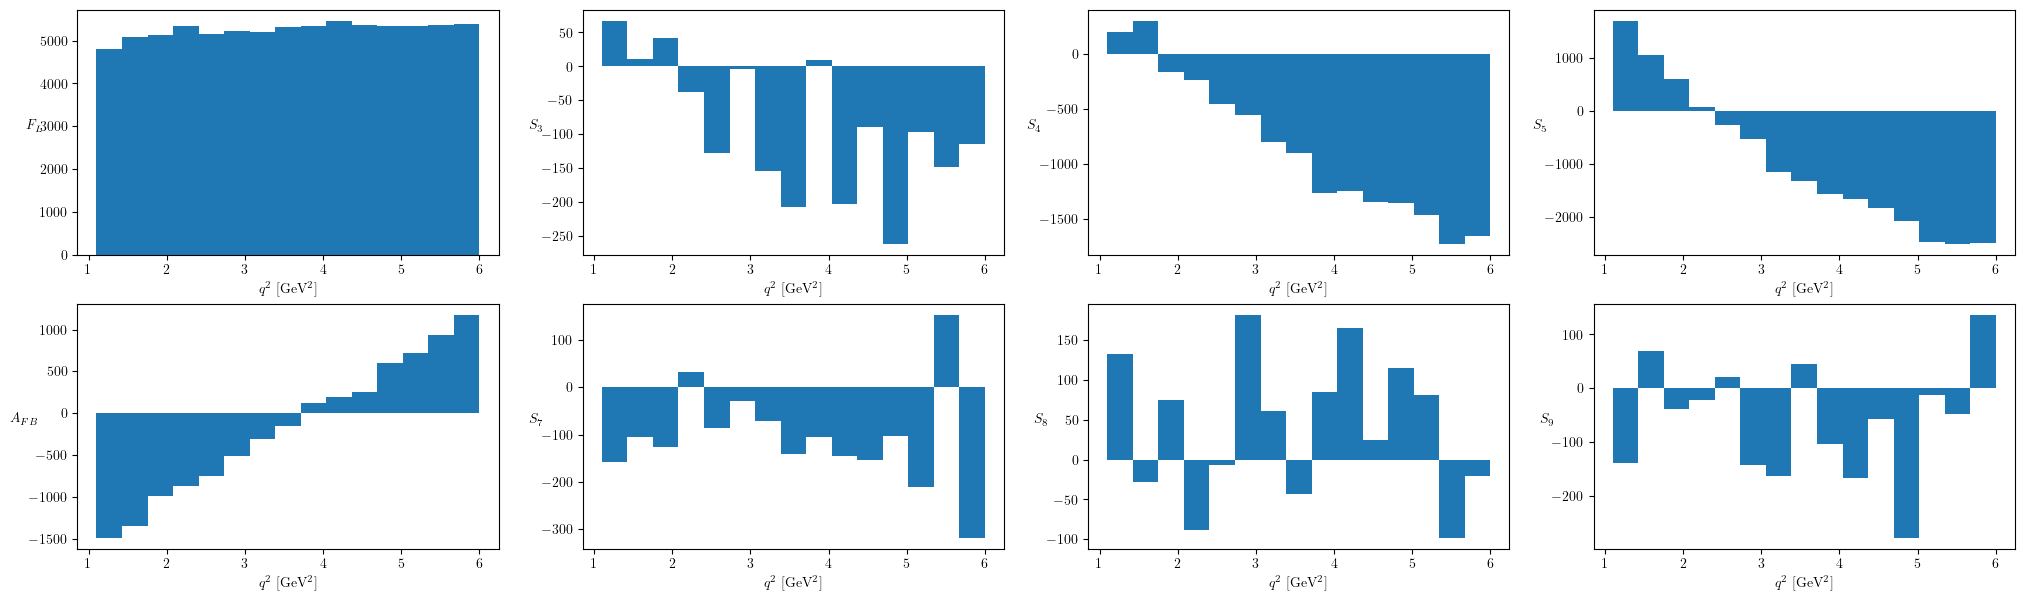

In [4]:
mom_bins = {}
fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (25,7))
_i = 0
for _row in ax:
    for _col in _row:
        mom_bins[obsList[_i]] = _col.hist(infile['q2'], weights = infile['moment_%s' % obsList[_i]], bins = 15)
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[obsList[_i]], rotation=0)
        _i += 1

Text(0.5, 0, '$q^{2}$ [GeV$^{2}$]')

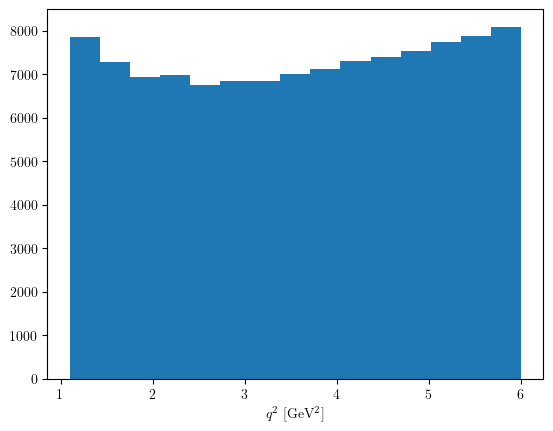

In [5]:
plt.figure()
r_bins = plt.hist(infile['q2'], bins = 15)
plt.xlabel("$q^{2}$ [GeV$^{2}$]")

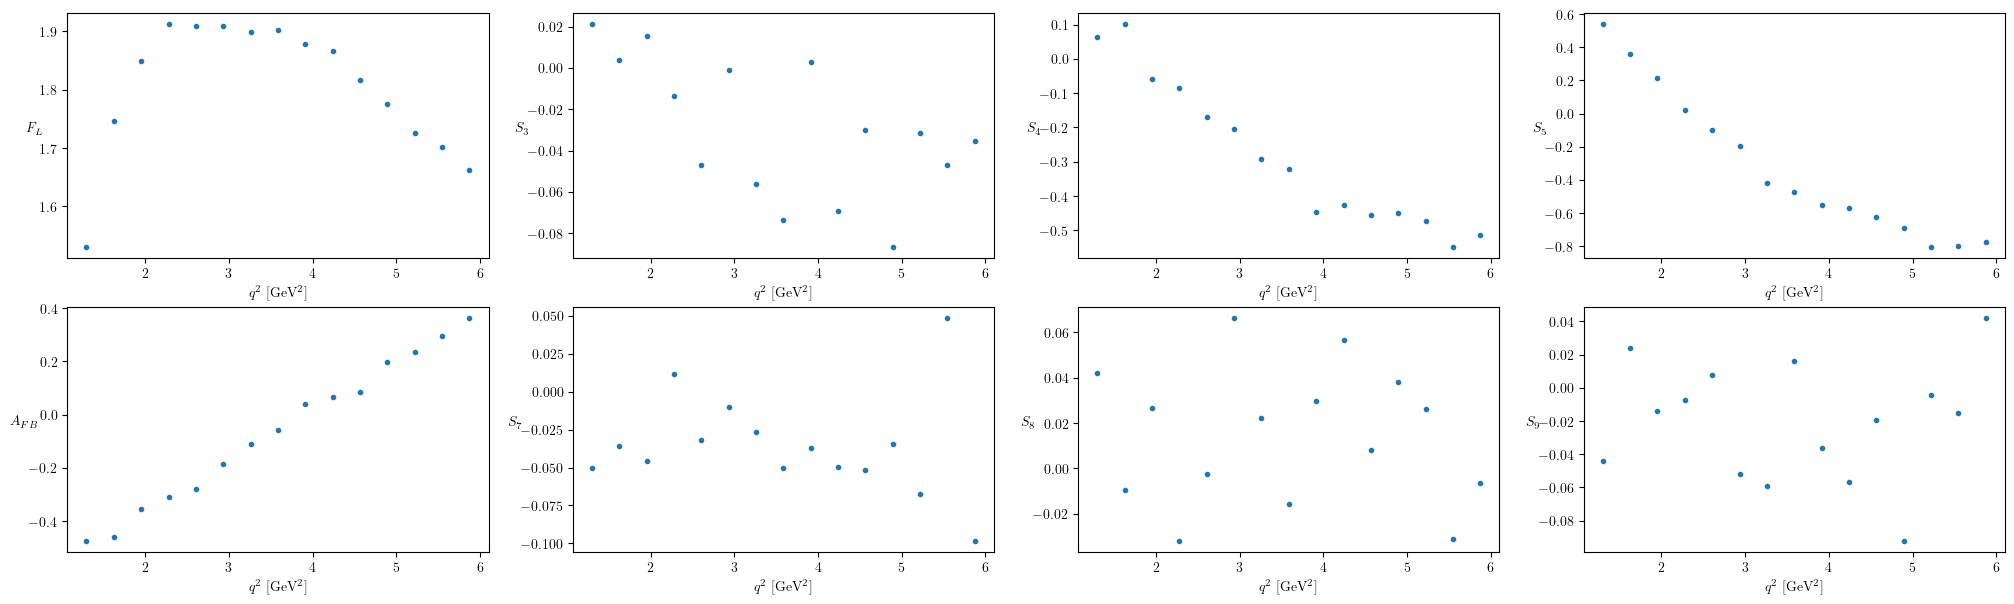

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (25,7))
_i = 0
for _row in ax:
    for _col in _row:
        _col.plot(r_bins[1][0:15]+0.2, (5/2) * mom_bins[obsList[_i]][0]/r_bins[0], '.')
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[obsList[_i]], rotation=0)
        _i += 1

In [7]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import RBF
from sklearn import neighbors
from scipy.ndimage.filters import gaussian_filter1d
from scipy.interpolate import interp1d 

In [8]:
#kernel = DotProduct() + WhiteKernel()
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

In [9]:
knn = neighbors.KNeighborsRegressor(400, weights="uniform")
#gpr = GaussianProcessRegressor(kernel=kernel,
#         random_state=0).fit(np.array(infile['q2'][:1000]).reshape(1000,1), infile['moment_5'][:1000])


In [10]:
#mean_prediction, std_prediction = gpr.predict(np.array(infile['q2'][:1000]).reshape(1000,1), return_std=True)
T = np.linspace(1.1,6.0,10000)[:, np.newaxis]
unbins = {}
for _s in range(200):
    unbins[_s] = {}
    tsample = infile.sample(20000)
    for _obs in obsList:
        unbins[_s][_obs] = knn.fit(np.array(tsample['q2']).reshape(20000,1), tsample['moment_%s' % _obs][:20000]).predict(T)

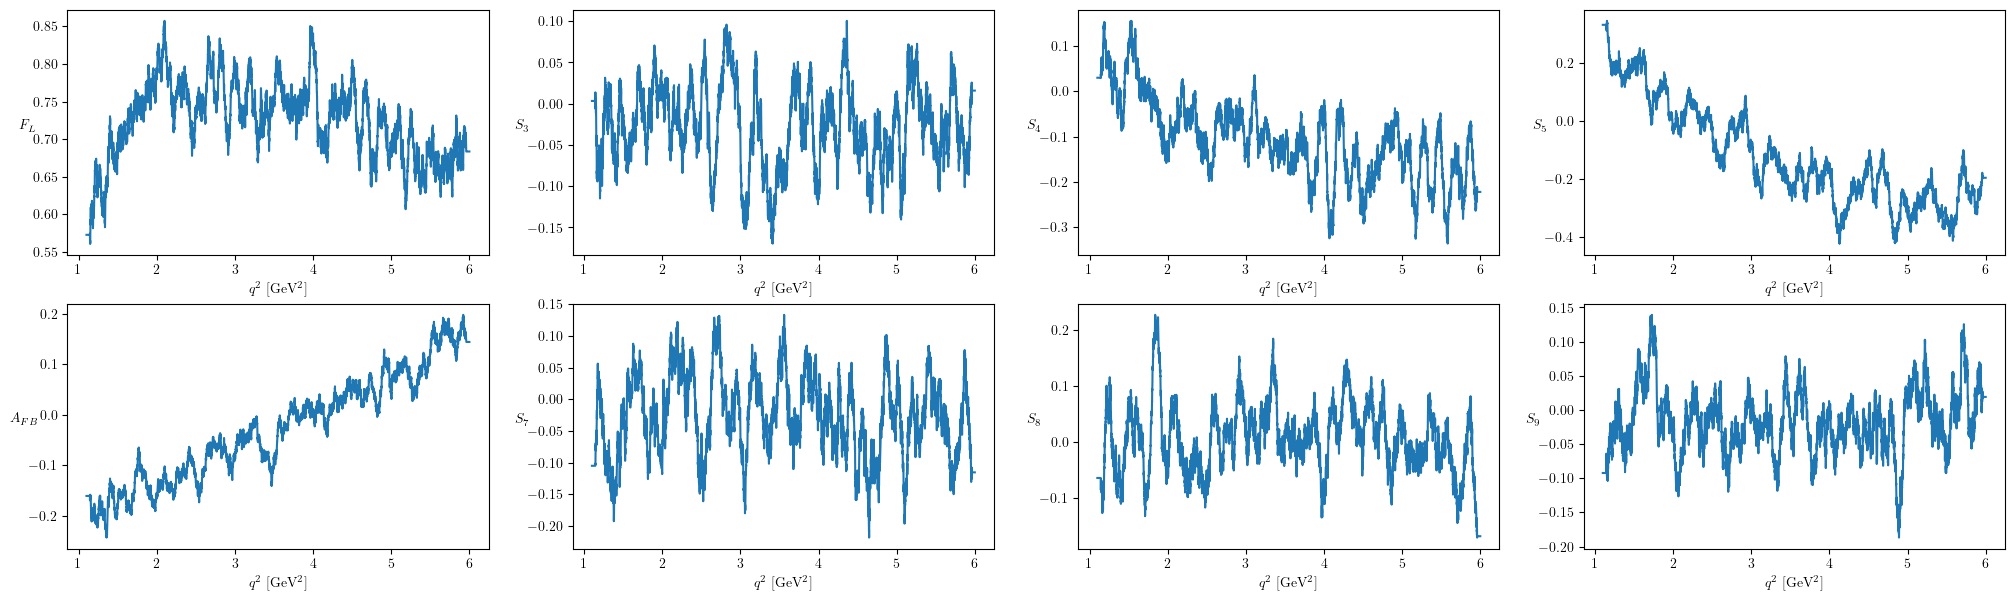

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (25,7))
_i = 0
for _row in ax:
    for _col in _row:
        _col.plot(T, unbins[0][obsList[_i]])
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[obsList[_i]], rotation=0)
        _i += 1

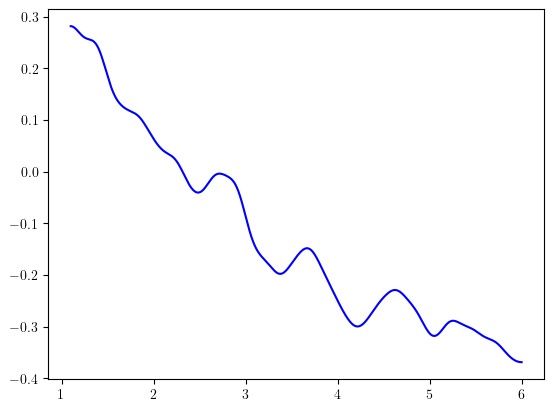

In [12]:
plt.plot(T, gaussian_filter1d(unbins[80]['S5'], sigma=200), color='b')

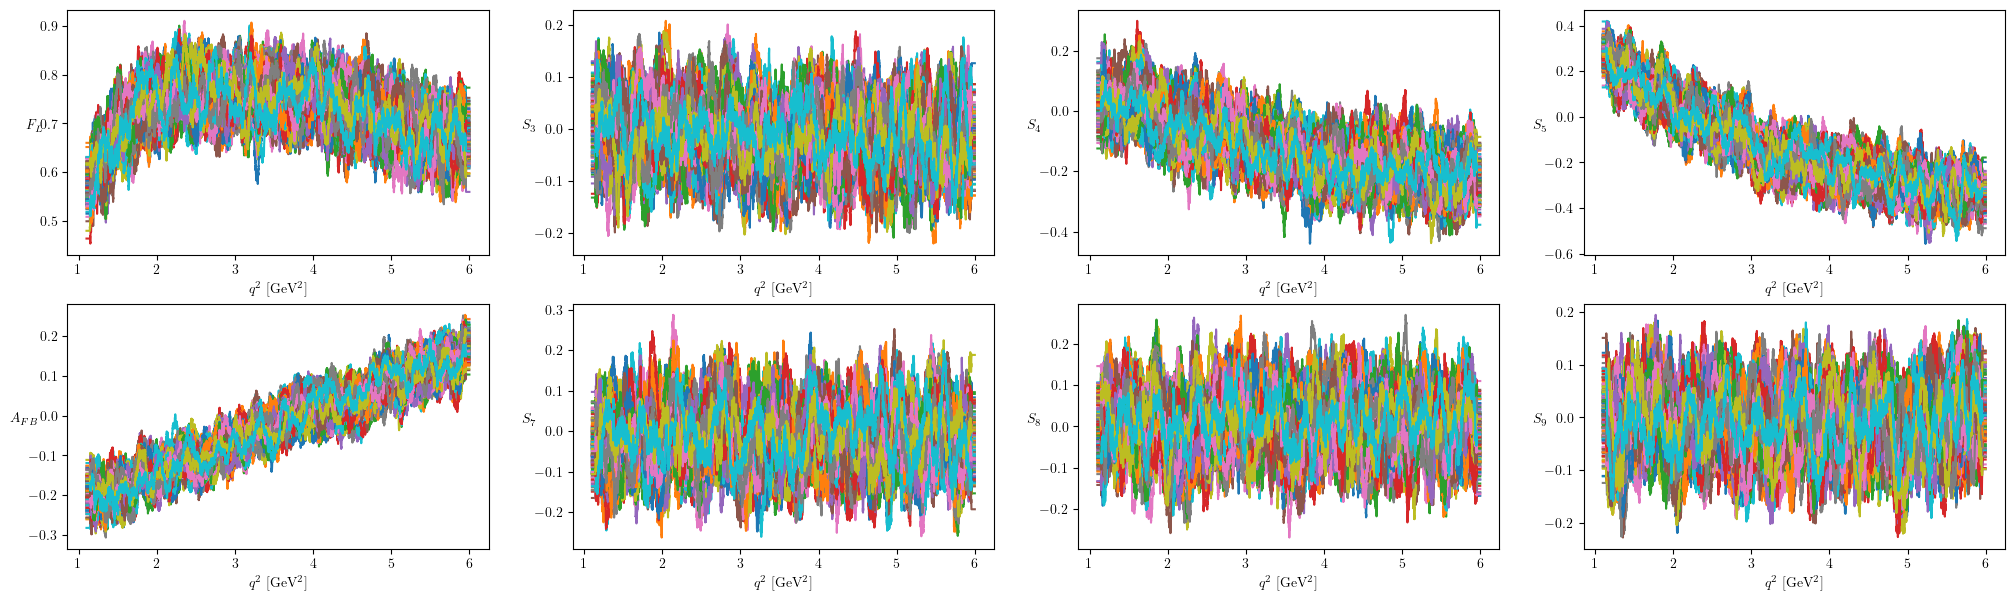

In [13]:
filtered_unbins = {}
fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (25,7))
_i = 0
for _row in ax:
    for _col in _row:
        _obs = obsList[_i]
        filtered_unbins[_obs] = {}
        for _s in range(200):
            filtered_unbins[_obs][_s] = gaussian_filter1d(unbins[_s][_obs], sigma=200)
            _col.plot(T, unbins[_s][_obs])
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[obsList[_i]], rotation=0)
        _i += 1

In [14]:
mean_vals = {}
lower_vals = {}
upper_vals = {}
sigma_vals = {}
for _obs in obsList:
    mean_vals[_obs] = []
    lower_vals[_obs] = []
    upper_vals[_obs] = []
    sigma_vals[_obs] = []
for _v in range(10000):
    for _obs in obsList:
        ordered = [unbins[_s][_obs][_v] for _s in range(200)]
        ordered.sort()
        mean_vals[_obs].append(np.mean(ordered))
        lower_vals[_obs].append(ordered[32])
        upper_vals[_obs].append(ordered[168])
        sigma_vals[_obs].append(0.5*abs(upper_vals[_obs][-1] - lower_vals[_obs][-1]))

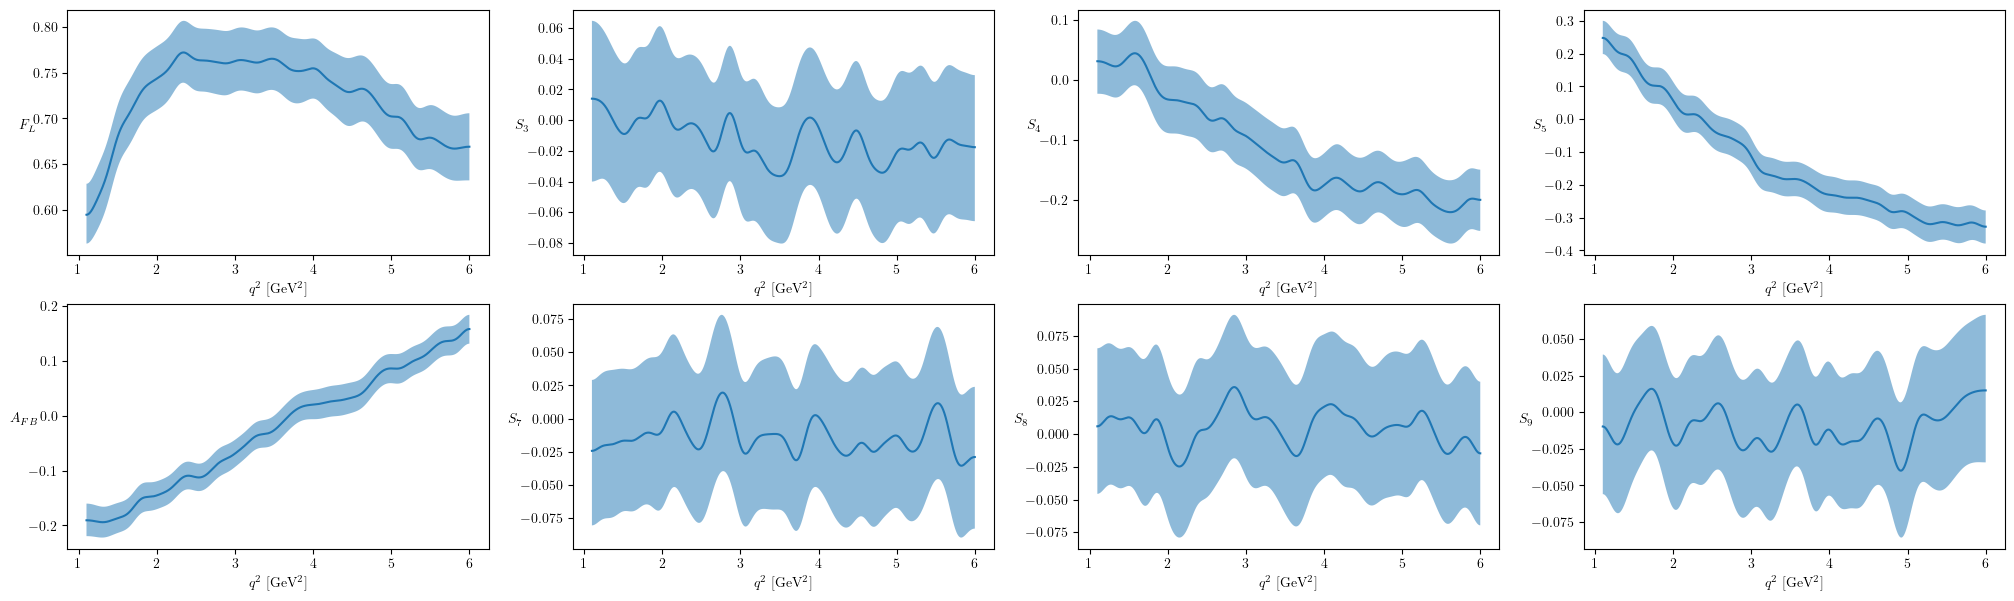

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (25,7))
_i = 0
for _row in ax:
    for _col in _row:
        _obs = obsList[_i]
        _col.plot(T, gaussian_filter1d(mean_vals[_obs], sigma=200))
        _col.fill_between(T.reshape(10000), gaussian_filter1d(lower_vals[_obs], sigma=200), gaussian_filter1d(upper_vals[_obs], sigma=200), alpha = 0.5)
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[obsList[_i]], rotation=0)
        _i += 1

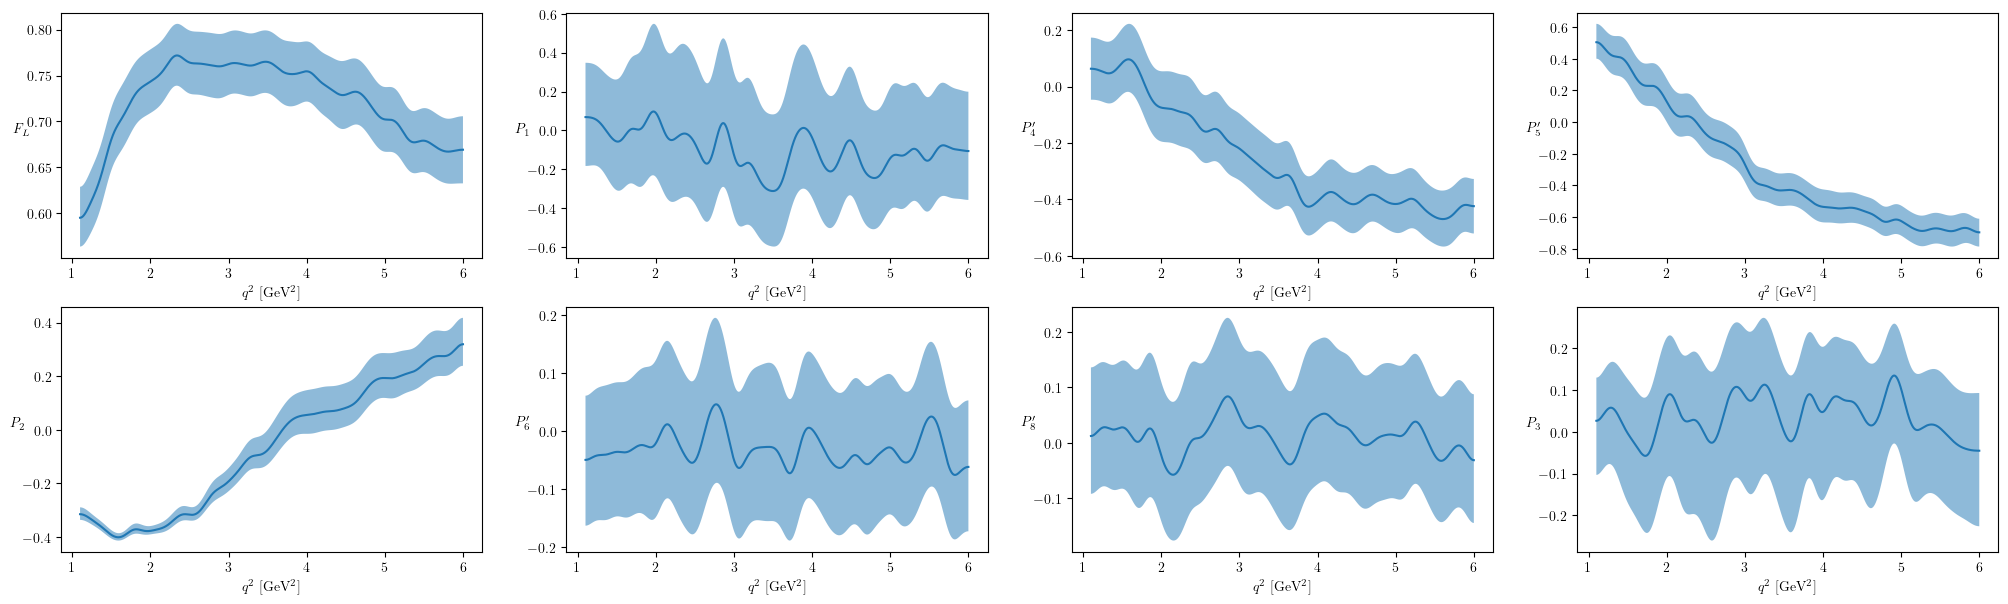

In [16]:
import importlib
importlib.reload(moments)
fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (25,7))
_i = 0
p_mean_vals = {}
p_lower_vals = {}
p_upper_vals = {}
for _row in ax:
    for _col in _row:
        _obs = obsList[_i]
        _optObs = optimisedObsTranslator[_obs]
        p_mean_vals[_optObs] = moments.calculateOptimisedObservable(mean_vals[_obs], mean_vals["FL"], _obs)
        p_lower_vals[_optObs] = moments.calculateOptimisedObservable(lower_vals[_obs], lower_vals["FL"], _obs)
        p_upper_vals[_optObs] = moments.calculateOptimisedObservable(upper_vals[_obs], upper_vals["FL"], _obs)        
        _col.plot(T, gaussian_filter1d(p_mean_vals[_optObs], sigma=200))
        _col.fill_between(T.reshape(10000), gaussian_filter1d(p_lower_vals[_optObs], sigma=200), gaussian_filter1d(p_upper_vals[_optObs], sigma=200), alpha = 0.5)
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[optimisedObsTranslator[_obs]], rotation=0)
        _i += 1

In [17]:
from sklearn.neighbors import BallTree

In [18]:
mb = 4.8
mB = 5.25
mB2 = mB**2
q2arr = T.reshape(10000)
sh = q2arr/mB2

r_ratio = -(mb/mB)*(1 + (p_mean_vals['P5p']*(sh - 1.))/(np.sqrt(4.*p_mean_vals['P2']**2 - 8.*p_mean_vals['P2']*p_mean_vals['P4p']*p_mean_vals['P5p'] + p_mean_vals['P5p']**2)) + sh )
r_ratio /= sh

/tmp/ipykernel_440123/243789933.py:7: RuntimeWarning: invalid value encountered in sqrt
  r_ratio = -(mb/mB)*(1 + (p_mean_vals['P5p']*(sh - 1.))/(np.sqrt(4.*p_mean_vals['P2']**2 - 8.*p_mean_vals['P2']*p_mean_vals['P4p']*p_mean_vals['P5p'] + p_mean_vals['P5p']**2)) + sh )


In [19]:
q2arr.reshape(10000)

array([1.1       , 1.10049005, 1.1009801 , ..., 5.9990199 , 5.99950995,
       6.        ])

Text(0.5, 0, '$q^{2}$ [GeV$^{2}$]')

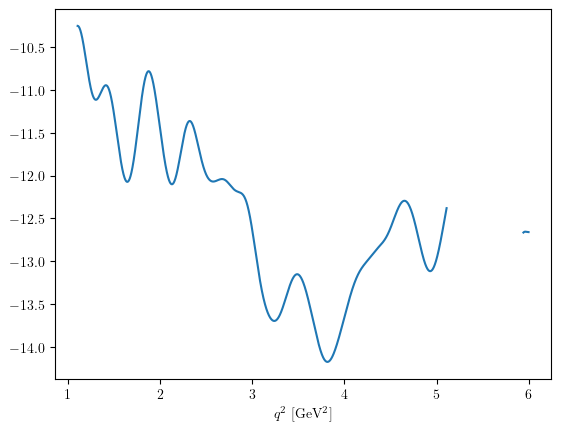

In [20]:
plt.figure()
plt.plot(q2arr.reshape(10000), gaussian_filter1d(r_ratio, sigma=200))
plt.xlabel("$q^{2}$ [GeV$^{2}$]")

In [21]:
 tree = BallTree(np.array(tsample['q2']).reshape(20000,1), leaf_size=2)

In [22]:
dist, ind = tree.query([[1.211]], k=400)

In [23]:
def moment5_var(indices, moment):
    rs = infile.loc[indices[0]]
    angles = 0.4 * moment - np.sqrt(1. - rs['ctl']*rs['ctl']) * 2 * rs['ctk'] * np.sqrt(1. - rs['ctk']*rs['ctk']) * np.cos(rs['phi'])
    tsum = np.sum(angles**2)
    return 2.5*np.sqrt((1./(299.*300.))*tsum)

In [24]:
moms5_var = moment5_var(ind, 0.)

In [25]:
tvars = []
_i = 0
for _q2 in T.reshape(10000):
    _, ind = tree.query([[_q2]], k=400)
    tvars.append(0.5*moment5_var(ind, mean_vals['S5'][_i]))
    _i+=1

In [26]:
current = {
    'S2c' : [-4.4444292e-08/6.17831e-8, -5.0072838e-08/6.29868e-8 , -6.8838896e-08/9.41826e-8],
    'S3' : [0.0089049437, -0.0085131542, -0.023252104],
    'S4' : [-0.010349509, -0.13171753, -0.21123314],
    'S5' : [6.9419e-9/6.17831e-8, -9.46732e-9/6.29868e-8, -2.94643e-8/9.41826e-8],
    'AFB' : [-0.1802, -0.07505, 0.07095],
    'S7' : [-0.016736809, -0.012995330, -0.013370855],
    'S8' : [-0.0038672801, -0.0035376542, -0.0016877821],
    'S9' : [-0.0038677392, -0.00098096590, 0.00050010764],
    'FL' : [4.4444292e-08/6.17831e-8, 5.0072838e-08/6.29868e-8 , 6.8838896e-08/9.41826e-8]
}
current_err = {
    'S2c' : [0.02178, 0.01954, 0.01597],
    'FL' : [0.02178, 0.01954, 0.01597],
    'S3' : [0.02416, 0.02357, 0.01945],
    'S4' : [0.03483, 0.03295, 0.02402],
    'S5' : [0.03241, 0.03179, 0.02374],
    'AFB' : [0.0197, 0.01717, 0.01403],
    'S7' : [0.03268, 0.0327, 0.02602],
    'S8' : [0.03516, 0.03383, 0.02633],
    'S9' : [0.02404, 0.02353, 0.01952]
}
current_q2_centre = [1.8, 3.25, 5.0]
current_q2_width = [0.7, 0.75, 1.0]

" \nfor _v in obsList:\n    plt.figure(figsize = (5,5))\n    plt.plot(T, mean_vals[_v])\n    #plt.fill_between(T.reshape(10000), np.subtract(mean_vals,tvars), np.add(mean_vals, tvars), alpha = 0.5, label = 'LHCb unbinned projected 30fb$^{-1}$')\n    plt.fill_between(T.reshape(10000), lower_vals[_v], upper_vals[_v], alpha = 0.5, label = 'LHCb unbinned 30fb$^{-1}$')\n    plt.errorbar(current_q2_centre, current[_v], yerr = current_err[_v], xerr = current_q2_width, label = 'LHCb binned 9fb$^{-1}$', linestyle = '')\n    plt.ylabel(obs_to_label[_v], fontsize = 20, rotation = 0)\n    plt.xlabel('$q^{2}$ [GeV$^{2}$]', fontsize = 20)\n    plt.legend(fontsize=16, frameon=False, markerfirst=False)\n    plt.xticks(fontsize=14)\n    plt.yticks(fontsize=14)\n    plt.tight_layout()\n    plt.savefig('unbinned_S5.png')\n"

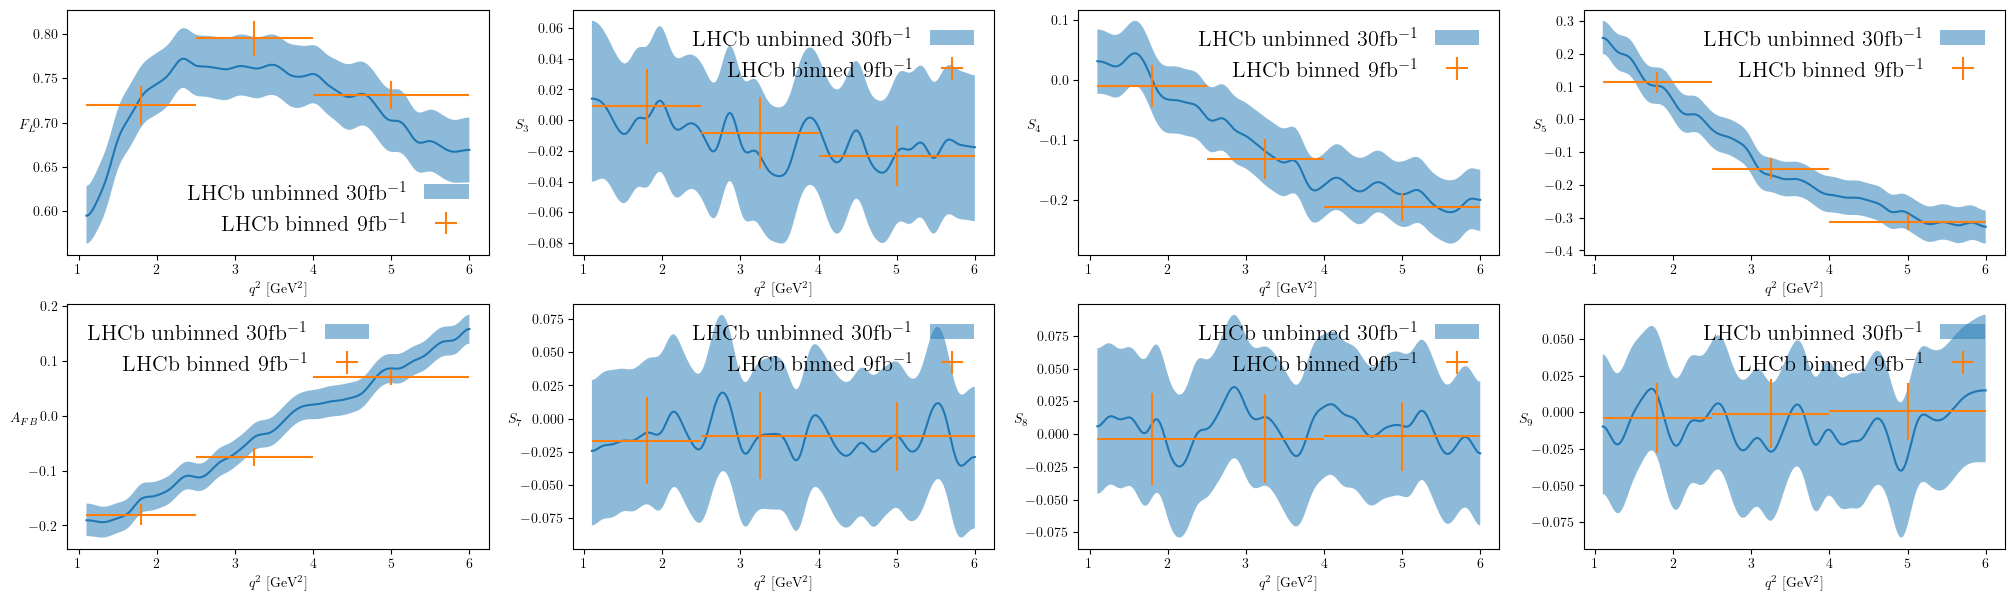

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (25,7))
_i = 0
for _row in ax:
    for _col in _row:
        _obs = obsList[_i]
        _col.plot(T, gaussian_filter1d(mean_vals[_obs], sigma=200))
        _col.fill_between(T.reshape(10000), gaussian_filter1d(lower_vals[_obs], sigma=200), gaussian_filter1d(upper_vals[_obs], sigma=200), alpha = 0.5, label = 'LHCb unbinned 30fb$^{-1}$')
        _col.errorbar(current_q2_centre, current[_obs], yerr = current_err[_obs], xerr = current_q2_width, label = 'LHCb binned 9fb$^{-1}$', linestyle = '')
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[obsList[_i]], rotation=0)
        _col.legend(fontsize=16, frameon=False, markerfirst=False)
        _i += 1
""" 
for _v in obsList:
    plt.figure(figsize = (5,5))
    plt.plot(T, mean_vals[_v])
    #plt.fill_between(T.reshape(10000), np.subtract(mean_vals,tvars), np.add(mean_vals, tvars), alpha = 0.5, label = 'LHCb unbinned projected 30fb$^{-1}$')
    plt.fill_between(T.reshape(10000), lower_vals[_v], upper_vals[_v], alpha = 0.5, label = 'LHCb unbinned 30fb$^{-1}$')
    plt.errorbar(current_q2_centre, current[_v], yerr = current_err[_v], xerr = current_q2_width, label = 'LHCb binned 9fb$^{-1}$', linestyle = '')
    plt.ylabel(obs_to_label[_v], fontsize = 20, rotation = 0)
    plt.xlabel('$q^{2}$ [GeV$^{2}$]', fontsize = 20)
    plt.legend(fontsize=16, frameon=False, markerfirst=False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.savefig('unbinned_S5.png')
"""

In [28]:
import json
with open('means.json', 'w') as fp:
    json.dump(mean_vals, fp)
with open('sigmas.json', 'w') as fp:
    json.dump(sigma_vals, fp)

In [29]:
filtered_unbins

{'FL': {0: array([0.6041261 , 0.60412682, 0.60412824, ..., 0.68727171, 0.68727201,
         0.68727215]),
  1: array([0.56802912, 0.56802933, 0.56802975, ..., 0.68083782, 0.68083989,
         0.68084092]),
  2: array([0.59623191, 0.59623278, 0.59623451, ..., 0.70070283, 0.7007033 ,
         0.70070353]),
  3: array([0.58796138, 0.58796212, 0.58796362, ..., 0.64000836, 0.64000756,
         0.64000716]),
  4: array([0.59682925, 0.5968294 , 0.59682969, ..., 0.66464761, 0.66464809,
         0.66464833]),
  5: array([0.54147568, 0.54147745, 0.54148097, ..., 0.67585817, 0.67585909,
         0.67585955]),
  6: array([0.60249078, 0.60249086, 0.60249103, ..., 0.67941859, 0.6794184 ,
         0.67941831]),
  7: array([0.6217781 , 0.62177859, 0.62177958, ..., 0.67647037, 0.67647111,
         0.67647148]),
  8: array([0.5873746 , 0.5873754 , 0.58737699, ..., 0.68855078, 0.68855063,
         0.68855056]),
  9: array([0.60075532, 0.60075557, 0.60075605, ..., 0.63413936, 0.63413901,
         0.634138

In [30]:
s5_point_10 = [filtered_unbins['S5'][_s][10] for _s in range(200)]
s5_point_100 = [filtered_unbins['S5'][_s][100] for _s in range(200)]
s4_point_10 = [filtered_unbins['S4'][_s][10] for _s in range(200)]
s4_point_100 = [filtered_unbins['S4'][_s][100] for _s in range(200)]

In [31]:
np.cov([s5_point_10,s5_point_100, s4_point_10, s4_point_100])

array([[ 0.00133167,  0.00126441, -0.000213  , -0.00020019],
       [ 0.00126441,  0.00120766, -0.00019816, -0.00018734],
       [-0.000213  , -0.00019816,  0.00140309,  0.00130983],
       [-0.00020019, -0.00018734,  0.00130983,  0.00123028]])

In [32]:
points = {}
for _v in obsList:
    points[_v] = {}
    for _p in range(10000):
        points[_v][_p] = [filtered_unbins[_v][_s][_p] for _s in range(200)]

In [33]:
points.keys()

dict_keys(['FL', 'S3', 'S4', 'S5', 'AFB', 'S7', 'S8', 'S9'])

In [34]:
np.corrcoef([points['S5'][_v] for _v in [1,100,1000,5000,9000]])

array([[ 1.        ,  0.99698724,  0.0168435 ,  0.01818816, -0.05323095],
       [ 0.99698724,  1.        ,  0.01770344,  0.02211616, -0.04708251],
       [ 0.0168435 ,  0.01770344,  1.        ,  0.07605214, -0.08815088],
       [ 0.01818816,  0.02211616,  0.07605214,  1.        , -0.1592949 ],
       [-0.05323095, -0.04708251, -0.08815088, -0.1592949 ,  1.        ]])

In [35]:
with open('covs.json', 'w') as fp:
    json.dump(points, fp)

In [36]:
to_calculate = {}
for _v in obsList:
    for _p in range(0,10000,100):
        to_calculate["%s_%s" % (_v,_p)] = points[_v][_p]
for_cov = pd.DataFrame(to_calculate)

In [37]:
for_cov

,FL_0,FL_100,FL_200,FL_300,FL_400,FL_500,FL_600,FL_700,FL_800,FL_900,...,S9_9000,S9_9100,S9_9200,S9_9300,S9_9400,S9_9500,S9_9600,S9_9700,S9_9800,S9_9900
0,0.604126,0.607558,0.616211,0.627092,0.638569,0.650709,0.663515,0.676120,0.687773,0.698548,...,-0.021141,-0.010102,0.004334,0.016907,0.023036,0.021932,0.017415,0.014587,0.015406,0.017931
1,0.568029,0.569052,0.571941,0.576993,0.586162,0.602277,0.625702,0.652129,0.675259,0.692063,...,-0.010653,-0.011424,-0.013600,-0.015219,-0.014961,-0.013336,-0.011860,-0.011571,-0.012331,-0.013274
2,0.596232,0.600313,0.609448,0.618689,0.627842,0.641735,0.663583,0.689811,0.712485,0.726068,...,0.032624,0.043392,0.047182,0.041970,0.028957,0.010997,-0.008392,-0.025434,-0.037269,-0.043373
3,0.587961,0.591552,0.600352,0.610307,0.618747,0.626429,0.635794,0.647837,0.661670,0.676358,...,0.014405,0.001379,-0.013860,-0.021770,-0.015012,0.005453,0.032264,0.058277,0.079561,0.093767
4,0.596829,0.597691,0.601513,0.610396,0.624300,0.640196,0.654259,0.664637,0.671991,0.677827,...,-0.006622,-0.006076,-0.000673,0.006756,0.011669,0.012245,0.010264,0.007867,0.005457,0.003170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.589374,0.591427,0.596155,0.601892,0.610160,0.624385,0.645140,0.668455,0.689233,0.704959,...,-0.062867,-0.050622,-0.028506,-0.004238,0.015925,0.028403,0.032648,0.030861,0.026654,0.023122
196,0.578278,0.584405,0.600050,0.619654,0.638962,0.657022,0.674757,0.692781,0.710572,0.726555,...,-0.014119,-0.010126,-0.007862,-0.007538,-0.006513,-0.001260,0.009101,0.021553,0.031721,0.037384
197,0.589742,0.594316,0.605610,0.618958,0.631904,0.646103,0.664300,0.685668,0.705238,0.718474,...,-0.036566,-0.043586,-0.039725,-0.026148,-0.009102,0.005140,0.012672,0.011501,0.002478,-0.008707
198,0.622400,0.623788,0.627711,0.633767,0.641591,0.650630,0.659813,0.667789,0.673857,0.679022,...,-0.028796,-0.018576,-0.003282,0.009291,0.013944,0.010753,0.001989,-0.011136,-0.027192,-0.041493


In [38]:
correlation_matrix = for_cov.corr()
correlation_matrix.to_json("correlation_matrix.json", indent = 4)

In [39]:
covariance_matrix = for_cov.cov()
covariance_matrix.to_json("covariance_matrix.json", indent = 4)

In [40]:
smoothed_mean_vals = {}
smoothed_sigma_vals = {}
for _o in obsList:
    smoothed_mean_vals[_o] = gaussian_filter1d(mean_vals[_o], sigma=200)
    smoothed_sigma_vals[_o] = gaussian_filter1d(sigma_vals[_o], sigma=200)